In [17]:
import faiss
import json
import numpy as np

In [18]:
faiss_path = "/mnt/mmlab2024nas/anhndt/Batch1/new_semantic/faiss/faiss_index_coca-clip.faiss"
mapping_path = "/mnt/mmlab2024nas/anhndt/Batch1/new_semantic/mapping/mapping_coca-clip.json"
embedds_path = "/mnt/mmlab2024nas/anhndt/Batch1/new_semantic/embeds/images_embeddings_coca-clip.npy"

In [19]:
processed_faiss_path = "/mnt/mmlab2024nas/anhndt/Batch1/processed_semantic/faiss/faiss_index_coca-clip.faiss"
processed_mapping_path = "/mnt/mmlab2024nas/anhndt/Batch1/processed_semantic/mapping/mapping_coca-clip.json"
processed_embedds_path = "/mnt/mmlab2024nas/anhndt/Batch1/processed_semantic/embeds/images_embeddings_coca-clip.npy"

In [20]:
with open(mapping_path, "r", encoding="utf-8") as f:
    mapping = json.load(f)

In [21]:
index = faiss.read_index(faiss_path)

In [22]:
embeddings = np.load(embedds_path)

In [38]:
embeddings.shape

(256, 768)

In [78]:
import matplotlib.pyplot as plt
from PIL import Image

def show_similar_images(embed_idx: int, top_k: int, embeddings, index, mapping):
    """
    Display the top_k most similar images to a given embedding in a 3x4 subplot grid.

    Args:
        embed_idx (int): Index of the query embedding in the embeddings array.
        top_k (int): Number of similar images to retrieve (max 12 fits in a 3x4 grid).
        embeddings (np.ndarray): The embedding matrix, shape (N, D).
        index (faiss.Index): The loaded FAISS index.
        mapping (list[dict]): A list of metadata dictionaries containing image paths.
    """
    # Ensure top_k does not exceed 12
    top_k = min(top_k, 12)

    # Get the query embedding
    query_embed = embeddings[embed_idx:embed_idx+1]

    # Perform nearest neighbor search
    distances, idxs = index.search(query_embed, top_k)
    print(idxs)

    # Create subplot grid (3 rows, 4 columns)
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()

    for rank, i in enumerate(idxs[0]):
        img_path = mapping[i]["path"]
        img = Image.open(img_path)

        axes[rank].imshow(img)
        axes[rank].set_title(f"Rank {rank+1}\nDist={distances[0][rank]:.4f}", fontsize=10)
        axes[rank].axis("off")

    # Hide unused subplots if top_k < 12
    for j in range(top_k, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


In [110]:
embed_idx=28
top_k=12

[[ 28 157 158 159 138 139 140 151 150 152 156 155]]


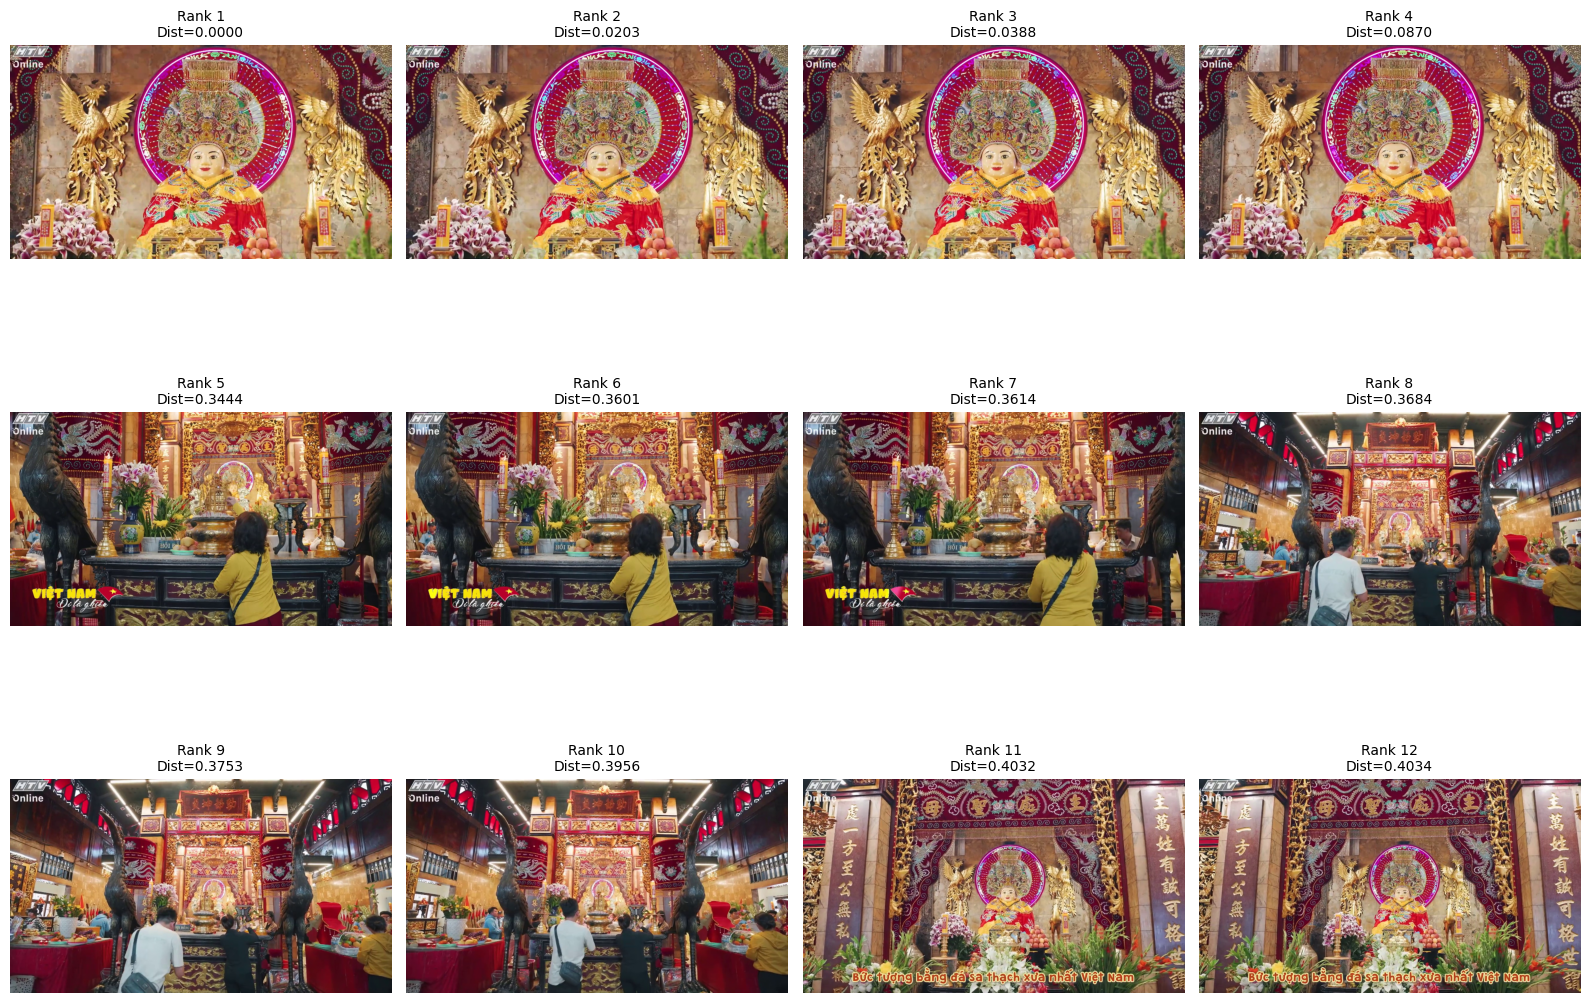

In [111]:
show_similar_images(embed_idx, top_k, embeddings, index, mapping)

In [85]:
a = []

In [90]:
len(embeddings)

256

In [109]:
for i in range(len(embeddings)):
    embedding = embeddings[i:i+1]
    distance, idx = index.search(embedding, 5)

    # lọc theo threshold
    filtered = [
        (d, j) for d, j in zip(distance[0], idx[0]) if d < 0.04 and d != 0
    ]

    # chỉ in khi có hơn 1 kết quả
    if len(filtered) > 1:
        print(f"index embedding: {i}" )
        print(f"Filtered: {filtered}")


index embedding: 19
Filtered: [(0.01698034, 20), (0.022333227, 21)]
index embedding: 20
Filtered: [(0.01698034, 19), (0.017441802, 21)]
index embedding: 21
Filtered: [(0.017441802, 20), (0.022333227, 19)]
index embedding: 28
Filtered: [(0.020289907, 157), (0.03877192, 158)]
index embedding: 47
Filtered: [(0.02089752, 48), (0.026164608, 50), (0.033358097, 49)]
index embedding: 48
Filtered: [(0.02089752, 47), (0.031061942, 50)]
index embedding: 50
Filtered: [(0.026164608, 47), (0.031061942, 48)]
index embedding: 57
Filtered: [(0.03770703, 58), (0.037832305, 56)]
index embedding: 157
Filtered: [(0.020289907, 28), (0.03309371, 158)]
index embedding: 158
Filtered: [(0.03309371, 157), (0.03877192, 28)]
index embedding: 186
Filtered: [(0.03668691, 188), (0.03933882, 187)]
